Student Name: Bimal Kandel

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import os

In [20]:
os.getcwd()

'C:\\Users\\bimal\\Documents'

In [34]:
#load the data using the right path
df = pd.read_csv("C:/Users/bimal/OneDrive/Documents/Mall_Customers.csv")

In [38]:
# checking the first five rows of the dataset to understand the data. 
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
# checking the statistics to understand the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [44]:
## To check for the data types in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Visualisation - Univariate Analysis

C:\Users\bimal\AppData\Local\Temp\ipykernel_19080\1485131431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Genre'], palette="Set2")  # Specify the palette


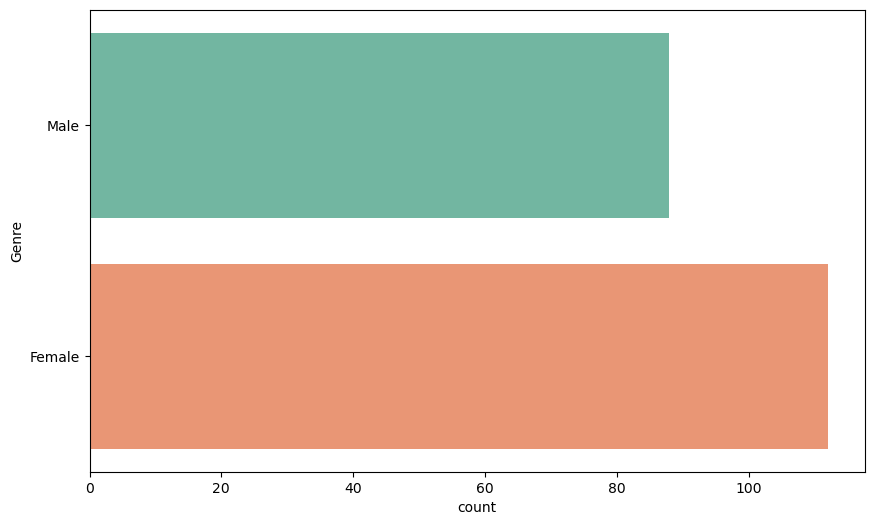

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(df['Genre'], palette="Set2")  # Specify the palette
plt.show()


There are more female customers than the Male

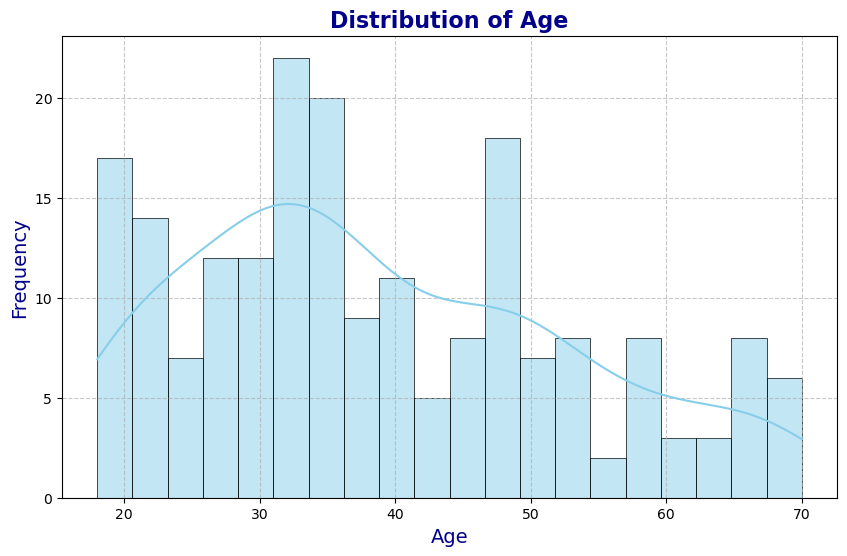

In [60]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue", edgecolor="black", linewidth=0.5)
plt.title("Distribution of Age", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Age", fontsize=14, color="darkblue")
plt.ylabel("Frequency", fontsize=14, color="darkblue")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Age of the customers follows right skewed normal distrbution. The higher the age the frequency of spending and visiting the mall has declined.

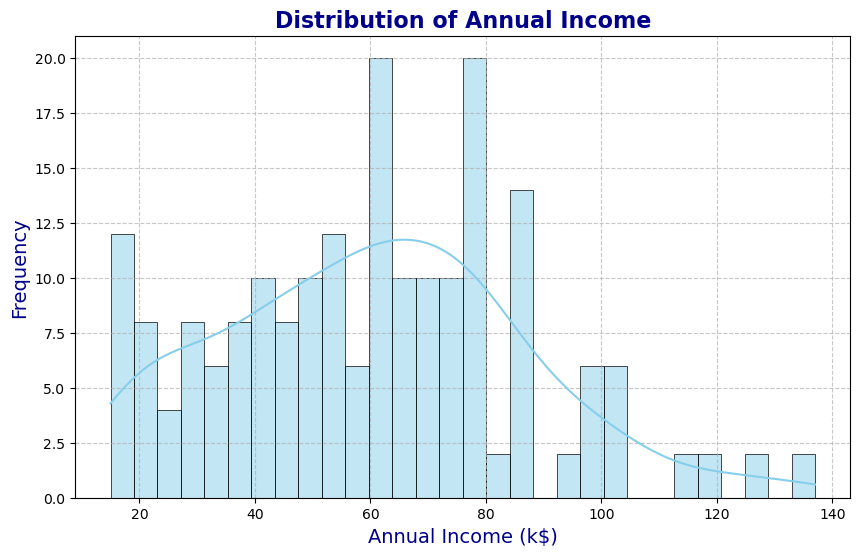

In [63]:


# Set the figure size for better clarity
plt.figure(figsize=(10, 6))

# Plot the distribution with both histogram and KDE (density) curve
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True, color="skyblue", edgecolor="black", linewidth=0.5)

# Add titles and labels
plt.title("Distribution of Annual Income", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Annual Income (k$)", fontsize=14, color="darkblue")
plt.ylabel("Frequency", fontsize=14, color="darkblue")

# Customize grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Annual income of the customers also follows right skewed normal distrbution.

ValueError: 'darkpurple' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

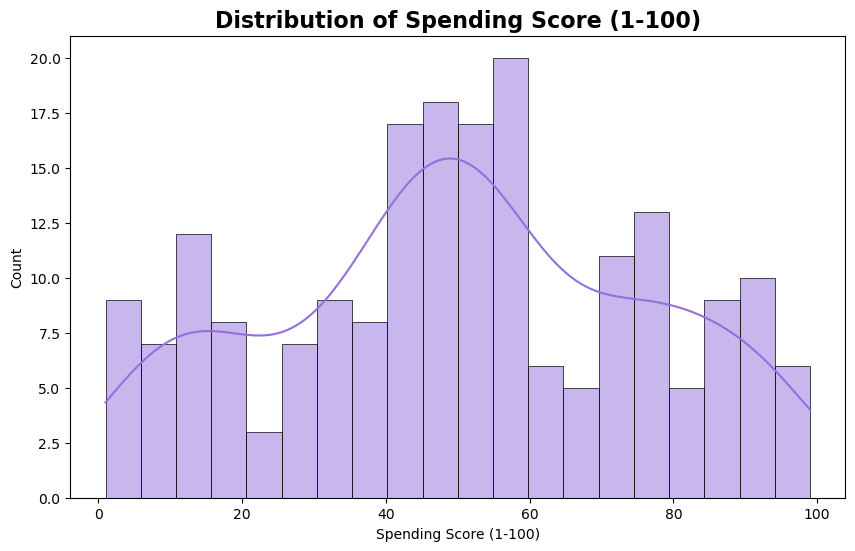

In [66]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution with both histogram and KDE (density) curve
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color="mediumpurple", edgecolor="black", linewidth=0.5)

# Add titles and labels
plt.title("Distribution of Spending Score (1-100)", fontsize=16, fontweight='bold', color="darkpurple")
plt.xlabel("Spending Score (1-100)", fontsize=14, color="purple")
plt.ylabel("Frequency", fontsize=14, color="purple")

# Customize grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

Spending score of the customers roughly follws normal distribution.This indicates that many customers tend to have a moderate spending score, and few customers have extremely high or low scores.

Data Visualisation - Bivariate Analysis

Time to check for the relationship between different features by using a pairplot.

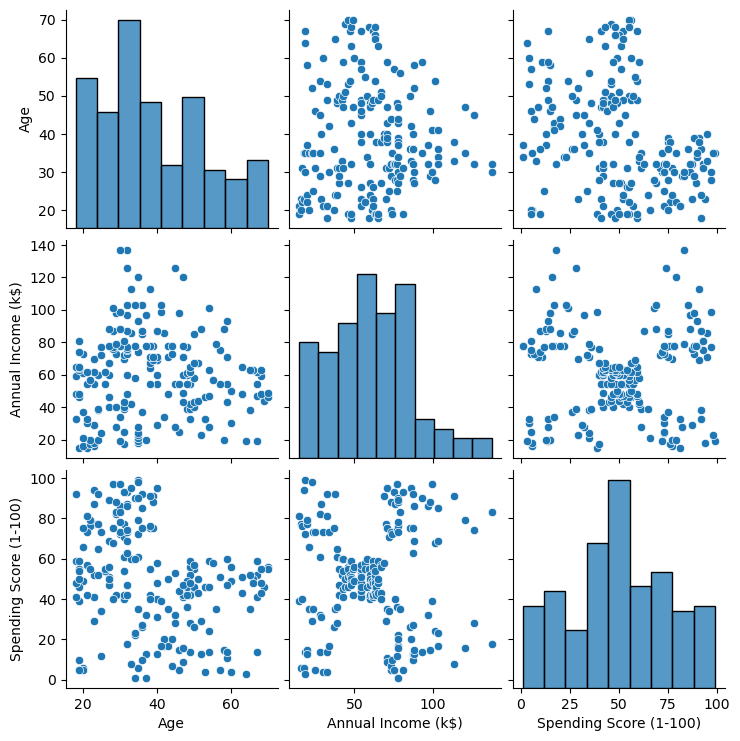

In [74]:
sns.pairplot(df[[ 'Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

Observations:

Most of the customers are in the 20-40 age group.
Spending score is high for the customers in the age group of 20-40.
Spending score is high for customers with very low and very high income.

Checking Corelation between features using the Heatmap

In [80]:
# Error only for documentation
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(df[[ 'Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

ValueError: could not convert string to float: 'Male'

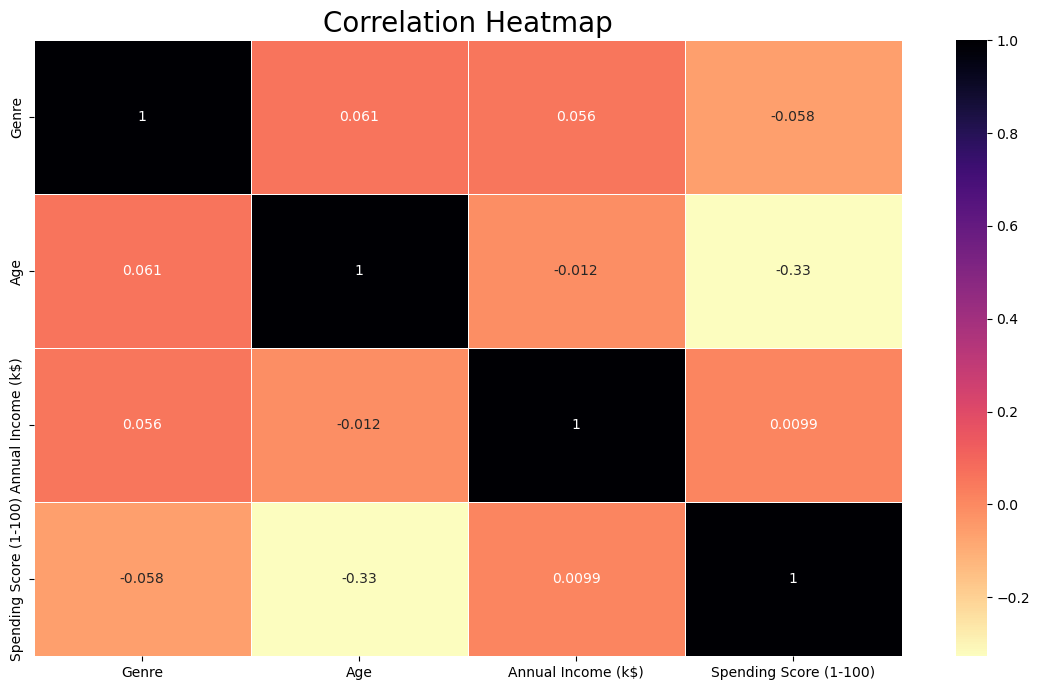

In [82]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Genre' column as numeric
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

# Select relevant columns (including the encoded 'Genre')
numeric_cols = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Calculate the correlation matrix
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(numeric_cols.corr(), cmap='magma_r', annot=True, linewidths=0.5)

# Add a title and show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


It Can be seen that there is not much corelation in this data between the differnt features

In [85]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a new DataFrame with the selected features
X = df[features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to standardize it
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Show the first few rows of the standardized data
print(X_scaled_df.head())


        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980



K-Means clustering based on annual income
Elbow method to find the optimal number of Clusters¶

C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

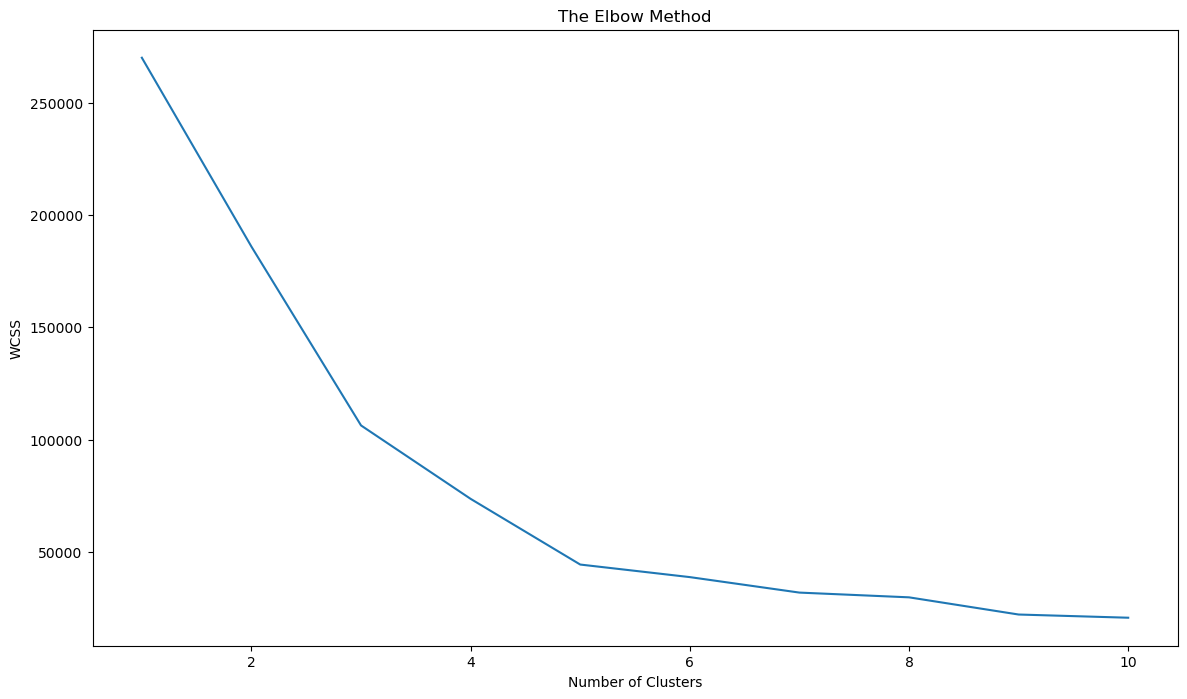

In [95]:
# using Elbow method to find the optimal number of Clusters
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above figure, we can see that last most significant slope occurs at k = 5 , hence we will have 5 clusters in this case.

C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


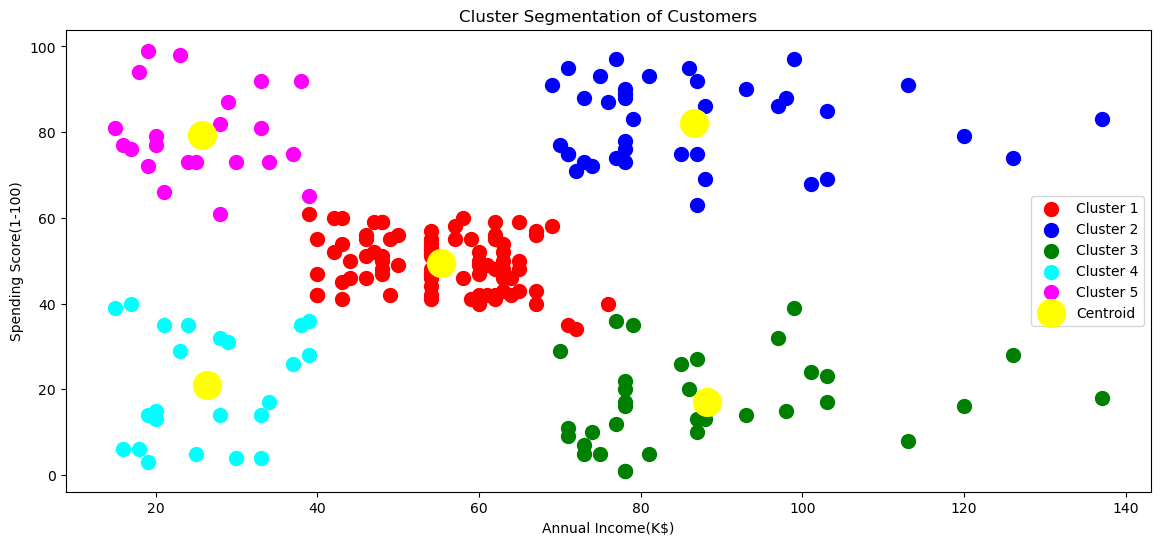

In [91]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

k-means clustering based on Age

C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

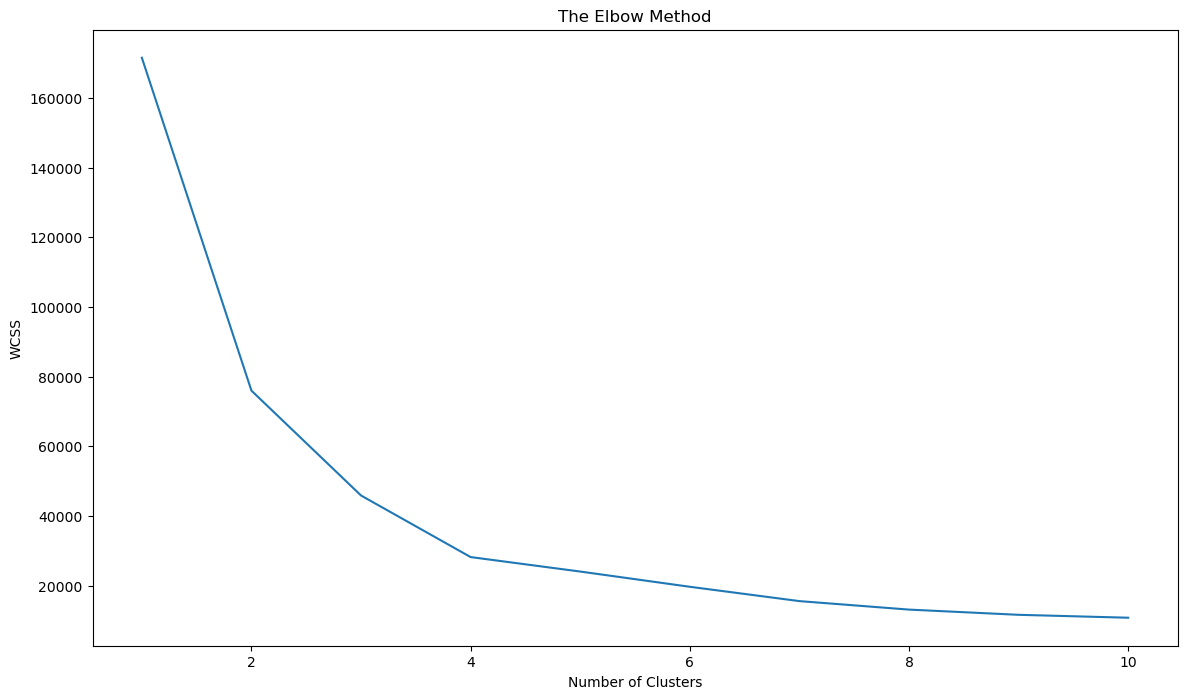

In [93]:
data = df.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss=[]  # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


k-means clustering based on Spending score (1-100)

C:\Users\bimal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


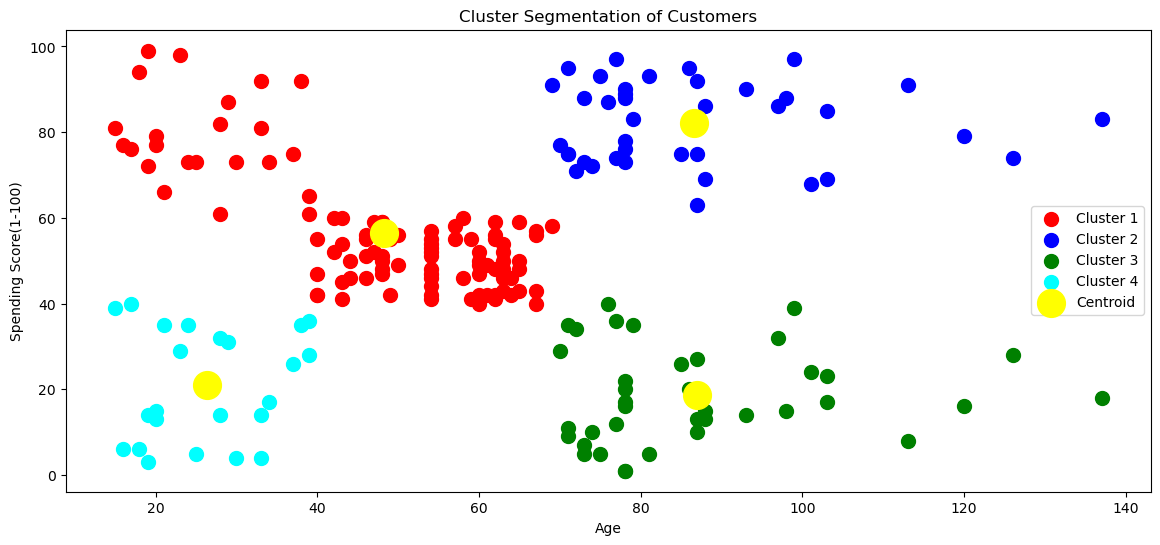

In [99]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#Plotting the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Results

We have been able to create distinct clusters based on various features by using k-means clustering. To boost profits, mall management can focus on clusters with average spending scores. They should also continue to have positive relationships with premium customers who have high spending scores.In order to improve the clients with poor spending scores, they should also focus on developing fresh, creative concepts.